## 1. The load of packages, modules, and data

In [1]:
import sys
from aqua import Reader
sys.path.insert(0, '../../../')
from tropical_rainfall import Tropical_Rainfall

Running tropical rainfall diagnostic...
Reading configuration yaml file..


In [2]:
diag = Tropical_Rainfall()
path_to_netcdf = diag.path_to_netcdf+'test_UTC/'

In [3]:
reader  = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="lra-r100-monthly")
ifs_tco2559_ng5    = reader.retrieve(var=["tprate"])

2023-11-10 20:46:46 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-11-10 20:46:46 :: Reader :: WARNING  -> It would be safer to run with fix=False
2023-11-10 20:46:46 :: Reader :: WARNING  -> You are asking for var ['tprate'] which is already fixed from ['tp'].
2023-11-10 20:46:46 :: Reader :: WARNING  -> Would be safer to run with fix=False
2023-11-10 20:46:46 :: eccodes :: WARNING  -> ShortName tprate have multiple grib codes associated: ['260048', '172228']
2023-11-10 20:46:46 :: eccodes :: WARNING  -> AQUA will take the first so that tprate -> 260048, please set up a correct fix if this does not look right


In [ ]:
diag.add_localtime_DataAaray(data = ifs_tco2559_ng5.isel(time=slice(0,2)), #space_grid_factor = 0.5,
                        path_to_netcdf=path_to_netcdf, name_of_file = 'ifs_tco2559_r050_3h')

In [8]:
%load_ext autoreload
%autoreload 2

In [ ]:
from aqua.slurm import slurm
slurm.job()

In [77]:
slurm.squeue()

JOBID      CPUS  NODES ST         NAME                 TIME       START_TIME           DEPENDENCY           PARTITION            MIN_MEMORY          
7651269    256   1     R          dask-worker          1:32       2023-11-09T20:35:43  (null)               compute              10G                 


0

### tco2559-ng5-cycle3

In [7]:
def get_3h_regrided_data(reader=None, time_starting: str = '2020-01-20', time_final: str = '2020-01-21', regrid: bool = True):
    """
    Retrieve and process data from the specified reader for a specific time period, and optionally perform regridding.

    Args:
        reader: The reader object used for retrieving the data.
        time_starting (str): The start date for the time period in the format 'YYYY-MM-DD'.
        time_final (str): The end date for the time period in the format 'YYYY-MM-DD'.
        regrid (bool): Whether to perform regridding on the retrieved data.

    Returns:
        If regrid is True, the regridded data over the specified time period. Otherwise, the processed data without regridding.
    """
    data_ret = reader.retrieve(vars='tprate')
    data_ret_sliced = data_ret.sel(time=slice(time_starting, time_final))
    data_ret_sliced_3h = reader.timmean(data_ret_sliced, freq="3H")
    if regrid:
        return reader.regrid(data_ret_sliced_3h)
    else: 
        return data_ret_sliced_3h

In [ ]:
time_starting= '2020-01-20'
time_final = '2020-01-21'

reader = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="2D_1h_native",  regrid="r100")
data_ret = reader.retrieve(vars='tprate')
data_ret_sliced = data_ret.sel(time=slice(time_starting, time_final))
data_ret_sliced_3h = reader.timmean(data_ret_sliced, freq="3H")

tmp = reader.regrid(data_ret_sliced_3h)

In [ ]:
diag.add_localtime_DataAaray(data = tmp, #space_grid_factor = 0.5,
                        path_to_netcdf=None)

In [ ]:
if diag.tools.get_machine()=='levante':
    reader = Reader(model="IFS", exp="tco2559-ng5-cycle3", source="2D_1h_native",  regrid="r050")
    ifs_3h_regrided = get_3h_regrided_data(reader=reader)
    
    diag.add_localtime_DataAaray(data = ifs_3h_regrided, #space_grid_factor = 0.5,
                        path_to_netcdf=path_to_netcdf, name_of_file = 'ifs_tco2559_r050_3h')

### ngc3028

In [ ]:
if diag.tools.get_machine()=='levante':
    reader = Reader(model="ICON", exp="ngc3028", source="PT3H", zoom=10,  regrid="r050")
    
    name_of_file = 'icon_ngc3028'
    
    ifs_3h_regrided = get_3h_regrided_data(reader=reader)
    
    diag.add_localtime_DataAaray(data = ifs_3h_regrided,
                        path_to_netcdf=path_to_netcdf,  name_of_file=name_of_file+'_r050_3h')

### mswep

In [ ]:
if diag.tools.get_machine()=='levante':
    reader = Reader(model="MSWEP", exp="past", source="3hourly", regrid="r050")
    
    name_of_file = 'mswep'
    
    ifs_3h_regrided = get_3h_regrided_data(reader=reader)
    
    diag.add_localtime_DataAaray(data = ifs_3h_regrided,
                        path_to_netcdf=path_to_netcdf,  name_of_file=name_of_file+'_r050_3h')

In [10]:
%load_ext autoreload
%autoreload 2

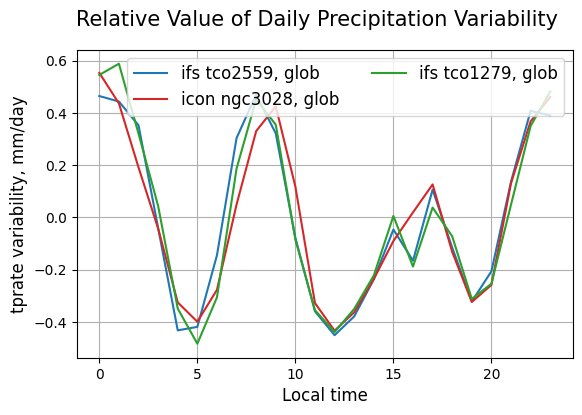

In [60]:
path = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/UTC_timing/"

filename =  "IFS/tco2559_ng5/trop_rainfall_3h_10km_tco2559_ng5_cycle3___GLOB_2020-01-20T00_2020-02-29T00.nc"
add = diag.daily_variability_plot(path_to_netcdf = path + filename, legend = 'ifs tco2559, glob')

filename =  "ICON/trop_rainfall_3h_10km_ngc3028_GLOB_2020-01-20T00_2020-02-29T00.nc"
add = diag.daily_variability_plot(path_to_netcdf = path + filename, legend = 'icon ngc3028, glob', 
                                  fig=add, color='tab:red')

filename = "IFS/tco1279_orca025/trop_rainfall_3h_10km_tco1279_orca025_cycle3_GLOB_2020-01-20T00_2020-02-29T00.nc"
add = diag.daily_variability_plot(path_to_netcdf=path+filename, legend = 'ifs tco1279, glob', 
                                  fig=add, color='tab:green')

#filename = "MSWEP/trop_rainfall_3h_10km_mswep_GLOB_2000-01-01T00_2000-02-29T21.nc"
#diag.daily_variability_plot(path_to_netcdf=path+filename, legend = 'mswep', 
#                            fig=add, color='tab:orange')

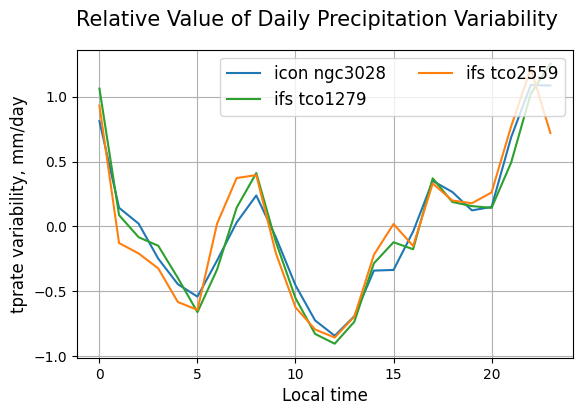

In [59]:
path = "/work/bb1153/b382267/tropical_rainfall_cicle3/NetCDF/UTC_timing/"

filename =  "ICON/trop_rainfall_3h_10km_ngc3028_2020-01-20T00_2020-02-29T00.nc"
add = diag.daily_variability_plot(path_to_netcdf = path + filename, legend = 'icon ngc3028')

filename = "IFS/tco1279_orca025/trop_rainfall_3h_10km_tco1279_orca025_cycle3_2020-01-20T00_2020-02-29T00.nc"
add = diag.daily_variability_plot(path_to_netcdf=path+filename, legend = 'ifs tco1279', 
                                  add=add, color='tab:green')

filename = "IFS/tco2559_ng5/trop_rainfall_3h_10km_tco2559_ng5_cycle3___2020-01-20T00_2020-02-29T00.nc"
add = diag.daily_variability_plot(path_to_netcdf=path+filename, legend = 'ifs tco2559', 
                            add=add, color='tab:orange')

#filename = "MSWEP/trop_rainfall_3h_10km_mswep_2000-01-01T00_2000-02-29T21.nc"
#diag.daily_variability_plot(path_to_netcdf=path+filename, legend = 'mswep', 
#                            add=add, color='tab:red')

                            